# Instroduction:

Diabetes is a chronic disease that affects millions of people worldwide, and it can lead to a range of serious complications if not managed properly.
By developing accurate predictive models for diabetes, healthcare providers can identify patients who are at high risk for developing complications or 
experiencing adverse health outcomes, and intervene early to prevent these outcomes.

Early identification of high-risk patients: By using predictive models, healthcare providers can identify patients who are at high risk for developing
complications such as kidney disease, neuropathy, or retinopathy, and intervene early to prevent or delay these complications.

More personalized care: Predictive models can help healthcare providers tailor their treatment plans to the specific needs of each patient, taking into 
account their individual risk factors, medical history, and other relevant factors.

Reduced healthcare costs: By identifying high-risk patients early and intervening to prevent complications, healthcare providers can reduce the overall
cost of care for diabetic patients.

Improved patient outcomes: By using predictive models to identify high-risk patients and intervene early, healthcare providers can improve patient outcomes
and quality of life.

Overall, studying predictive models for diabetic patients can help healthcare providers provide more effective, personalized care, and ultimately improve
patient outcomes while reducing healthcare costs

We aim to find possible correlation between 
The dataset used for the project can be found on the following web address: 
https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

We have used the second of the 3 files for the purpose of this project. It has been cleaned and wrangled from another data file which can be found on the following web address: 
https://www.kaggle.com/cdc/behavioral-risk-factor-surveillance-system
This dataset was created using the annual telephone survey conducted by the Center for Disease Control and Prevention under The Behavioral Risk Factor Surveillance System (BRFSS) program. 

Finally, we adapted the dataset and publiched it online using GitHub. This is the dataset we read in our project. It can be found here:
https://drive.google.com/u/0/uc?id=1OAZCpZGdFPy70ll_Fo2ow5dpaM1sG_47&amp;export=download

# !!! Describe the dataset with the file we use: what factors, what cols involve? each cols means what
eg: 
AnyHealthcare
Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes
CholCheck: 1 = yes cholesterol check in 5 years
# More detail question: how does a concoction of factors such as Age, BMI, Smoking habits, 
Income effect a non-diabetic person's chances of acquiring type-2 diabetes?

Method and Result:
    
While there may be numerous methods to conduct such an analysis, we find that a predictive model would suit best for our purpose of the research for two reasons: 
    reason 1: our target is to identify a categorical variable
    reason 2: a relatively simple algorithm to implement, since it only requires calculating distances between data points and selecting the k-nearest neighbors.

# Should we or how we improve those method?
 We shall first run some preliminary analysis before deploying sophisticated tools to analyse areas of interest. Our classifier model will take variables such as a person's age, bmi, smoking habits, income etc. into account to identify non-diabetic patients most at risk of acquiring diabetes. 
This can be done in several ways. For instance, the average distance of 3 nearest diabetic patients can be used to determine how likely a person is to acquire diabetes. Participants of the survey who's average distance to the 3 nearest diabetics on the graph is below a certain level can be classified most at-risk.
Another possible method is to use K-nearest neighbors classification algorithm, although this method would be more suitable to classify someone as diabetic or non-diabetic rather than predicting which respondents are most at-risk.

# My draft for method section
1. we run some preliminary analysis to select the factors in raw dataset, identify the potential predictors to build our predictive classification model
2. in order to build a good-quality classification model, we split the data into training dataset and testing dataset, which can be use to test the quality of overall classifier
/// only preprocess the training dataset


3. Then we should tune on our training dataset by cross-validation. The classifier need to pick a K value to maximize the accuracy. Thus we choose to use cross-validation. If we just split the tranining data once to evaluate, the K maybe strongly depends on the specific valiadation and sub-training dataset, which lead to be overfitting or underfitting 
4. In R, we can use the vfold_cv function to conduct cross-validation. To utilize this function, we need to  indicate the number of folds (v) and the categorical variable.
5. Generate a new model specification for K-nearest neighbor but instead of defining a value for the K, using function tune()
6. Create a workflow() analysis that put fruit_recipe and new knn_tune model specification.
7. Plot the line diagram which can find different K with different accuracy. In this case, we should roughly optiminal accuracy but not too expensive for calculating (not too large);  does not change much if you change KK to a nearby value

8. Then put this K into our best fit classifier, training the model and using the test dataset to evaluate the predictive model.
9. We use the test data set to evaluate the best K classifier accuracy and answer the predictive question:...


In [ ]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
library(infer)
library(cowplot)
#library(corrplot)
#options(repr.matrix.max.rows = 6)
#source('tests.R')
#source('cleanup.R')

url <- "https://drive.google.com/u/0/uc?id=1OAZCpZGdFPy70ll_Fo2ow5dpaM1sG_47&amp;export=download"
diabetes_data <- read_csv(url)

summary(diabetes_data)

In [ ]:
# make more readable, slice the data
slice(diabetes_data, 1:10)

# ??? DO a exploratory data analysis to identify the potential predictors? 
# !! need to improve to more concise


# finding a good subset of predictors

Since whole dataset contain 21 explanatory variables, based on our KNN classification, we identify the numerical variables which could give us more accurate prediction.
The variables with only 0 or 1 may strongly influence the result after standardlization.


First, we select mutate the Diabetes_binary as a categorical variable;
Then we choose only numerical explanatory variables since our purpose is to use KNN classification (which is a distance-based algorithm, calculating distances between the data points to determine the nearest neighbor) to predict. 
Slice first 10 rows to make the dataset more readable

We identify it could have relationship with diabetes prediction, in our further exploratory analysis with KNN classification, we should make sure all the predictors are numerical variable.
BUT We create another logical dataset to seperately analysis the relationship between those logical variables and diabetes by using visualization. 

In [ ]:

diabetes_numerical_data <- diabetes_data |>
    mutate(Diabetes_binary = as.factor(Diabetes_binary)) |>
    select(-Smoker,
           -PhysActivity,
          -Veggies,
          -HvyAlcoholConsump, -AnyHealthcare, -NoDocbcCost, 
          -DiffWalk,
          -Sex,-HighBP, -HighChol, -CholCheck,
          -Stroke,-HeartDiseaseorAttack, -Fruits) |>
      summarize(across(Diabetes_binary:Income,na.rm =TRUE)) 

# select(BMI,Age,Income,Smoker,Diabetes_binary)

slice(diabetes_numerical_data, 1:10)

diabetes_logical_data <- diabetes_data |>
    mutate(Diabetes_binary = as.factor(Diabetes_binary)) |>
    select(Smoker,
           PhysActivity,
          Veggies,
          HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, 
          DiffWalk,
          Sex, HighBP, HighChol, CholCheck,
          Stroke, HeartDiseaseorAttack, Fruits, Diabetes_binary) |>
    summarize(across(Smoker:Diabetes_binary,na.rm =TRUE)) 
    # mutate(Smoker:Fruits == as.logical(Smoker:Fruits))   

slice(diabetes_logical_data,1:10)

Now in the numerical dataset we contain only 6 explanatory variable and need to further identify relevant potential predictors to maximize the accuracy for the classifer. 

# Draft method 1: Forward selection method
///result have NA??
We choose to use forward selection (Eforymson 1966; Draper and Smith 1966) to  build up a model by adding one predictor variable at a time; First, we create a model formula for each subset of predictors for which we want to build a model.

In [ ]:
names <- colnames(diabetes_data |> select(-Diabetes_binary))
example_formula <- paste("Diabetes_binary", "~", paste(names, collapse="+"))

we need to create a empty tibbles and add the predictors into this tibbles, finding the best predictors;
Then we create a normal recipe for classification and do the cross-validation for each combination of predictors

In [ ]:
# Create an empty tibble and add the predictors into this tibble
accuracies <- tibble(size = integer(),
model_string = character(),
accuracy = numeric())

knn_spec <- nearest_neighbor(weight_func = "rectangular",
neighbors = tune()) |>
set_engine("kknn") |>
set_mode("classification")

diabetes_vfold <- vfold_cv(diabetes_data, v = 5, strata = diabetes_data$Diabetes_binary)

n_total <- length(names)

selected <- c()

Here we will use two for loops: one over increasing predictor set sizes (where you see for (i in 1:length(names)) below), and another to check which predictor to add in each round (where you see for (j in 1:length(names)) below). For each set of predictors to try, we construct a model formula, pass it into a recipe, build a workflow.

In [ ]:
for (i in 1:n_total) {
# for every predictor still not added yet
accs <- list()
models <- list()
for (j in 1:length(names)) {
# create a model string for this combination of predictors
preds_new <- c(selected, names[j])
model_string <- paste("Diabetes_binary", "~", paste(preds_new, collapse="+"))

# create a recipe from the model string
diabetes_recipe <- recipe(as.formula(model_string),
data = diabetes_data) |>
step_scale(all_predictors()) |>
step_center(all_predictors())

# tune the KNN classifier with these predictors,
# and collect the accuracy for the best K
acc <- workflow() |>
add_recipe(diabetes_recipe) |>
add_model(knn_spec) |>
tune_grid(resamples = diabetes_vfold, grid = 10) |>
collect_metrics() |>
filter(.metric == "accuracy") |>
summarize(mx = max(mean))
acc <- acc$mx %>% unlist()

# add this result to the dataframe
accs[[j]] <- acc
models[[j]] <- model_string
}
jstar <- which.max(unlist(accs))
accuracies <- accuracies |>
add_row(size = i,
model_string = models[[jstar]],
accuracy = accs[[jstar]])
selected <- c(selected, names[jstar])
names <- names[-jstar]
}
        

We can visualize the relationship between different variables and accuracy.
...

# Draft method 2: correlation matrix

In [ ]:
library(corrplot)

# Compute correlation matrix
corr_mat <- cor(diabetes_data)

# Create a correlation plot
corrplot(corr_mat, type = "upper", order = "hclust",
tl.col = "black", tl.srt = 45, tl.cex = 0.7)

# ? visualization for exploratory data analysis: Use the diagram to show relationship between each factor

/// also we need to improve the visualization to show whether smoker and diabetes have relationship (more concise and clear way)

# Draft method 3: Using ggpair to identify and visual the explanatory variables 


too complicated

In [ ]:
explanatory_numerical_variables_visualization <- ggpairs(diabetes_data,c("Income",
                                                       "BMI",
                                                       "GenHlth",
                                                       "MentHlth",
                                                       "PhysHlth",
                                                       "Age",
                                                       "Education",
                                                      "Diabetes_binary"), 
        columns = c(1,2,3,4,5,6), 
        aes(color = Diabetes_binary))
        
explanatory_numerical_variables_visualization

# how to interpret the plot?
# Age, GenHlth, PhysHlth have stronger relationship from ggpair?

# ggpairs to visualize the logical variables 
In the logical variables dataset, we use the ggpairs to compare and identify whether those variables have stronger relationship with diabetes_binary. 

In [ ]:
explanatory_logical_variables_visualization <- ggpairs(diabetes_logical_data,
                                                       c("Smoker",
                                                         "PhysActivity",
                                                         "Veggies",
                                                         "HvyAlcoholConsump",
                                                         "AnyHealthcare",
                                                         "NoDocbcCost",
                                                         "DiffWalk",
                                                         "Sex",
                                                         "HighBP",
                                                         "HighChol",
                                                         "CholCheck",
                                                         "Stroke",
                                                         "HeartDiseaseorAttack",
                                                         "Fruits",
                                                      "Diabetes_binary"), 
        columns = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14), 
        aes(color = Diabetes_binary)))
explanatory_logical_variables_visualization

# Draft method 4: Bar plot

/// writing part

In [ ]:
# for logical variable
# filter the diabetes patients with the logical factor == 1
diabetes_subset <- diabetes_logical_data |>
        filter(Diabetes_binary == "1") |>
        summarize(across(Smoker:Fruits,sum, na.rm =TRUE)) |>
                pivot_longer(cols = Smoker:Fruits,
                     names_to = "logical_factor",
                     values_to = "logical_value") 

# visualize the plot: most frequent symptoms for diabetes patients 
options(repr.plot.width = 30, repr.plot.height = 10)
diabetes_subset_bar <- ggplot(diabetes_subset, aes(x = fct_reorder(logical_factor, logical_value, .desc = TRUE),
                                                   y = logical_value))+
        geom_bar(stat = "identity") +
        labs(x = "Diabetes factor", y = "Frequencies for the diabetes patient") +
        theme(text = element_text(size = 20))


diabetes_subset
diabetes_subset_bar

As we saw from the bar plot, most of the diabetes patitents have symptoms with CholCheck and AnyHealthcare, which significantly higher compared with other symptoms. So we identify those 2 sumptoms is potential relevant predictors and add in our classifer model.

Now we use the histogram to identify the numerical variables for diabetes and non-diabetes patients. Variables with significant different distribution for different labels could be identify as potential predictors in our case.


In [ ]:
library(scales)

BMI_dis <- ggplot(diabetes_numerical_data, aes(x = BMI, fill = Diabetes_binary)) +
        geom_histogram(binwidth = 5) +
        facet_grid(cols = vars(Diabetes_binary)) +
        labs(x = "BMI", fill = "Diabetes label")

GenHlth_dis <- ggplot(diabetes_numerical_data, aes(x = GenHlth, fill = Diabetes_binary)) +
        geom_histogram(binwidth = 5) +
        facet_grid(cols = vars(Diabetes_binary)) +
        labs(x = "GenHlth", fill = "Diabetes label") +
        #theme(text = element_text(size = 12)) +
        scale_x_log10(labels = comma)
  
MentHlth_dis <- ggplot(diabetes_numerical_data, aes(x = MentHlth, fill = Diabetes_binary)) +
        geom_histogram(binwidth = 5) +
        facet_grid(cols = vars(Diabetes_binary)) +
        labs(x = "MentHlth", fill = "Diabetes label")

PhysHlth_dis <- ggplot(diabetes_numerical_data, aes(x = PhysHlth, fill = Diabetes_binary)) +
        geom_histogram(binwidth = 5) +
        facet_grid(cols = vars(Diabetes_binary)) +
        labs(x = "PhysHlth", fill = "Diabetes label")

Age_dis <- ggplot(diabetes_numerical_data, aes(x = Age, fill = Diabetes_binary)) +
        geom_histogram(binwidth = 5) +
        facet_grid(cols = vars(Diabetes_binary)) +
        labs(x = "Age", fill = "Diabetes label")

Income_dis <- ggplot(diabetes_numerical_data, aes(x = Income, fill = Diabetes_binary)) +
        geom_histogram(binwidth = 5) +
        facet_grid(cols = vars(Diabetes_binary)) +
        labs(x = "Income", fill = "Diabetes label")

options(repr.plot.width = 15, repr.plot.height = 7)
plot_grid(BMI_dis,GenHlth_dis,MentHlth_dis,
          PhysHlth_dis,Age_dis, Income_dis, ncol = 3)


? Compared with 6 numerical variables distribution for diabetes and non diabetes patients, we could identify that BMI, Age, Income(?), PhysHlth(?) as the potential predictors in our classifer

In [ ]:
# clean the cols with irrelevant variables
diabetes_clean <- diabetes_data |>
    mutate(Diabetes_binary = as.factor(Diabetes_binary)) |>
    select(BMI,Age,CholCheck,AnyHealthcare,Income, Diabetes_binary)
slice(diabetes_clean,1:15)

# Building a classifier and tune the model

In [ ]:
set.seed(1)
diabetes_split <- initial_split(diabetes_clean, prop =0.75, strata = Diabetes_binary) 
diabetes_train <-training(diabetes_split)
diabetes_test <-testing(diabetes_split)

#make more readable and show that our sub dataset already shuffle)
#should we show that the dataset is balanced and stra
slice(diabetes_train,1:10)
slice(diabetes_test,1:10)

In [ ]:
# tuning and build the classifier by using cross-validation

set.seed(1)
diabetes_vfold <- vfold_cv(diabetes_train, v = 5, strata = Diabetes_binary)

diabetes_recipe <- recipe(Diabetes_binary ~ ., data =diabetes_train)  |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

kval = tibble(neighbors = seq(1:30))

knn_results <- workflow() |>
  add_recipe(diabetes_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = diabetes_vfold, grid = kval) |>
  collect_metrics() |>
  filter(.metric == "accuracy")

knn_results

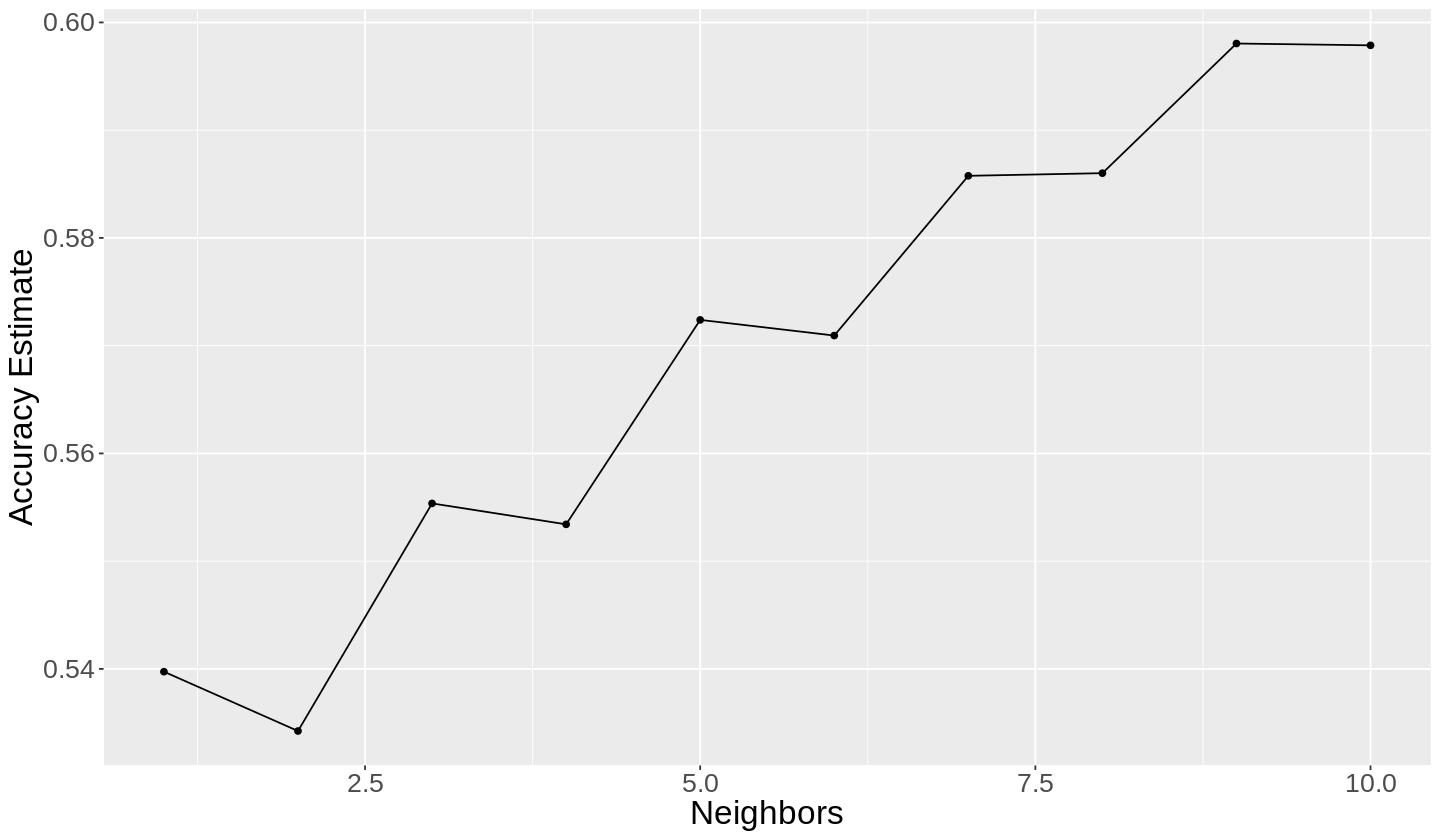

In [79]:
options(repr.plot.width = 12, repr.plot.height = 7)

# Plot k values against their respective accuracies and choose optimal k value
cross_val_plot <- knn_results |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    theme(text = element_text(size = 20))

cross_val_plot

In [80]:
# using best accuracy K put into the classifier and train
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 9) |>
  set_engine("kknn") |>
  set_mode("classification")

diabetes_fit <- workflow() |>
  add_recipe(diabetes_recipe) |>
  add_model(knn_best_spec) |>
  fit(data = diabetes_train)


In [81]:
# using test dataset to evaluate the quality of classifier, then interpret the result
# Get the prediction column
diabetes_predictions <- predict(diabetes_fit, diabetes_test) |> 
    bind_cols(diabetes_test)

# Compare the accuracy of predictions to the true values in the test set
diabetes_acc <- diabetes_predictions |> 
    metrics(truth = Diabetes_binary, estimate = .pred_class)  |>
    select(.metric, .estimate)|> 
    filter(.metric == "accuracy")

# Compare the predictions to the true values in a confusion matrix
diabetes_cm <- diabetes_predictions |> 
    conf_mat(truth = Diabetes_binary, estimate = .pred_class)
diabetes_acc

.metric,.estimate
<chr>,<dbl>
accuracy,0.5878126


# ?? create the visualization for the analysis? how to do that with multivariable classifier?
/// giving an example observation in test dataset. 
1. Firstly, puting observation in a two variable training data diagram (with label)
2. secondly, using classifier to identify the label, and using KNN algthorim to identify nearest label in the graph.


# Discussion: (writing part)
    1. what you find?: from what: 
        classifier accuracy
        is predictors help to improve accuracy? ...
        
    2. different with expectation?
    3. impact of this finding?
    4. lead what further questions?: For instance, can a similar model be built for all such diseases which do not have outright physical indicators. If models can be built for predicting or classifying patients as healthy, at-risk and patient, then could a model be built for curing diabetes and similar diseases?